In [172]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

sns.set_theme(font_scale=1.7, style='whitegrid') 

In [176]:
ene = np.loadtxt("Results/ene_100_blocks.0")
len(ene)

100

In [177]:
T = 2.0
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )
x_mean = np.linspace(0,np.max(ene.T[0]))
y_mean = x_mean*0 + e 

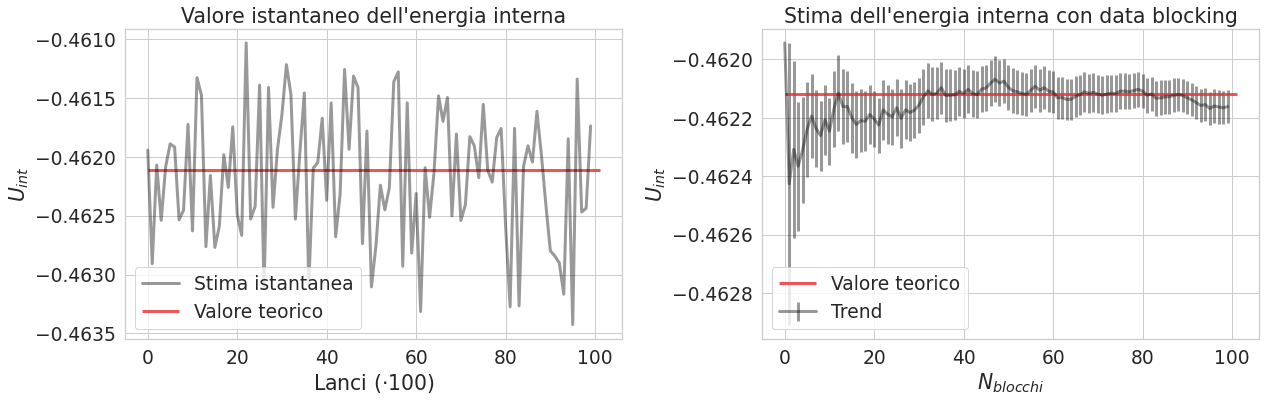

In [179]:
x = np.arange(100)

plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
plt.title("Valore istantaneo dell'energia interna")
plt.plot(ene.T[1], color='black', alpha=0.4, linewidth=3, label='Stima istantanea')
plt.hlines(e,0,101, color='#EE2C2C', linewidth=3, alpha=0.8, label='Valore teorico')
plt.xlabel('Lanci ($\cdot 100$)')
plt.ylabel('$U_{int}$')
plt.legend()

plt.subplot(1,2,2)
plt.title("Stima dell'energia interna con data blocking")
plt.errorbar(x, ene.T[2], yerr=ene.T[3], color='black', alpha=0.4, label='Trend', linewidth=3)
plt.hlines(e,0,101, color='#EE2C2C', linestyle='-', label="Valore teorico", linewidth=3, alpha=0.8)
plt.ylabel("$U_{int}$")
plt.xlabel("$N_{blocchi}$")
plt.legend()
plt.tight_layout()

plt.show()

In [219]:
ene_metro  = np.loadtxt("Results/ene_metro.0")
#ene_metro  = np.loadtxt("output.ene.0")
heat_metro = np.loadtxt("Results/heat_metro.0")
chi_metro  = np.loadtxt("Results/chi_metro.0")
ene_gibbs  = np.loadtxt("Results/ene_gibbs.0")
heat_gibbs = np.loadtxt("Results/heat_gibbs.0")
chi_gibbs  = np.loadtxt("Results/chi_gibbs.0")
M_metro    = np.loadtxt("Results/mag_metro.0")
M_gibbs    = np.loadtxt("Results/mag_gibbs.0")


xx = np.arange(151)

In [182]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset

T = np.linspace(0.5,2.0,num=151)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )

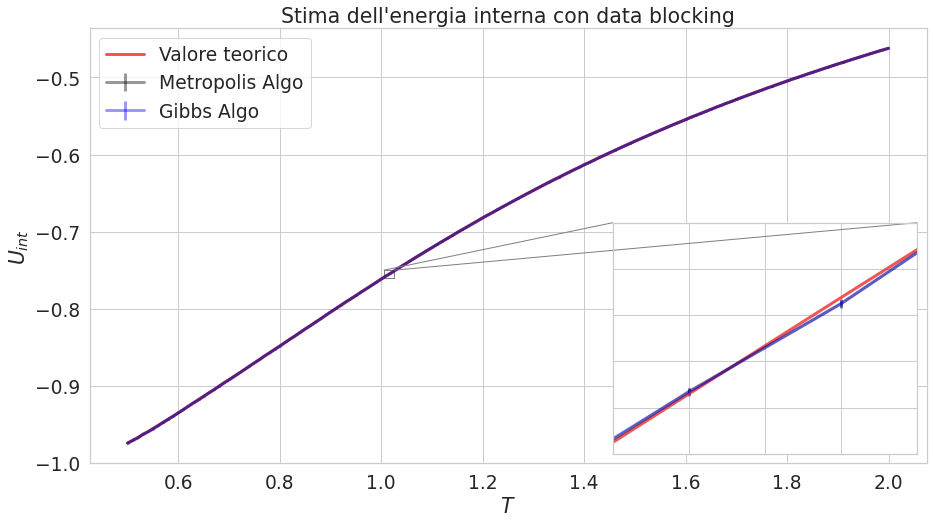

In [157]:
fig, ax = plt.subplots(figsize=[15, 8])
plt.title("Stima dell'energia interna con data blocking")
plt.ylabel("$U_{int}$")
plt.xlabel("$T$")

x1, x2, y1, y2 = 1.005, 1.025, -0.76,-0.75
axins = zoomed_inset_axes(ax, zoom=30, loc=4)
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
plt.xticks(visible=False)
plt.yticks(visible=False)

ax.plot(T, e, color='#EE2C2C', linestyle='-', label="Valore teorico", linewidth=3, alpha=0.8)
axins.plot(T, e, color='#EE2C2C', linestyle='-', label="Valore teorico", linewidth=3, alpha=0.8)
ax.errorbar(T, ene_metro.T[2], yerr=ene_metro.T[3], color='black', alpha=0.4, linewidth=3, label='Metropolis Algo')
axins.errorbar(T, ene_metro.T[2], yerr=ene_metro.T[3], color='black', alpha=0.4, linewidth=3, label='Metropolis Algo')
ax.errorbar(T, ene_gibbs.T[2], yerr=ene_gibbs.T[3], color='blue', alpha=0.4, linewidth=3, label='Gibbs Algo')
axins.errorbar(T, ene_gibbs.T[2], yerr=ene_gibbs.T[3], color='blue', alpha=0.4, linewidth=3, label='Gibbs Algo')

mark_inset(ax, axins, loc1=2, loc2=1, fc="none", ec="0.5")

ax.legend()
plt.show()

In [136]:
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)

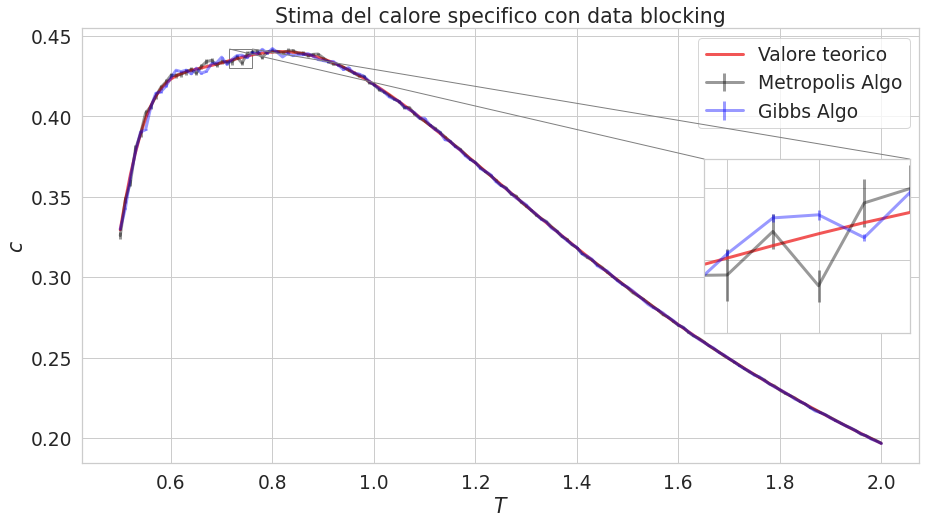

In [147]:
fig, ax = plt.subplots(figsize=[15, 8])
plt.title("Stima del calore specifico con data blocking")
plt.ylabel("$c$")
plt.xlabel("$T$")

x1, x2, y1, y2 = 0.715, 0.76, 0.43, 0.442
axins = zoomed_inset_axes(ax, zoom=9, loc=5)
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
plt.xticks(visible=False)
plt.yticks(visible=False)

ax.plot(T, heat, color='#EE2C2C', linestyle='-', label="Valore teorico", linewidth=3, alpha=0.8)
axins.plot(T, heat, color='#EE2C2C', linestyle='-', label="Valore teorico", linewidth=3, alpha=0.8)
ax.errorbar(T, heat_metro.T[2], yerr=heat_metro.T[3], color='black', alpha=0.4, linewidth=3, label='Metropolis Algo')
axins.errorbar(T, heat_metro.T[2], yerr=heat_metro.T[3], color='black', alpha=0.4, linewidth=3, label='Metropolis Algo')
ax.errorbar(T, heat_gibbs.T[2], yerr=ene_gibbs.T[3], color='blue', alpha=0.4, linewidth=3, label='Gibbs Algo')
axins.errorbar(T, heat_gibbs.T[2], yerr=ene_gibbs.T[3], color='blue', alpha=0.4, linewidth=3, label='Gibbs Algo')

mark_inset(ax, axins, loc1=2, loc2=1, fc="none", ec="0.5")

ax.legend()
plt.show()

In [130]:
chi = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)
#chi_gibbs

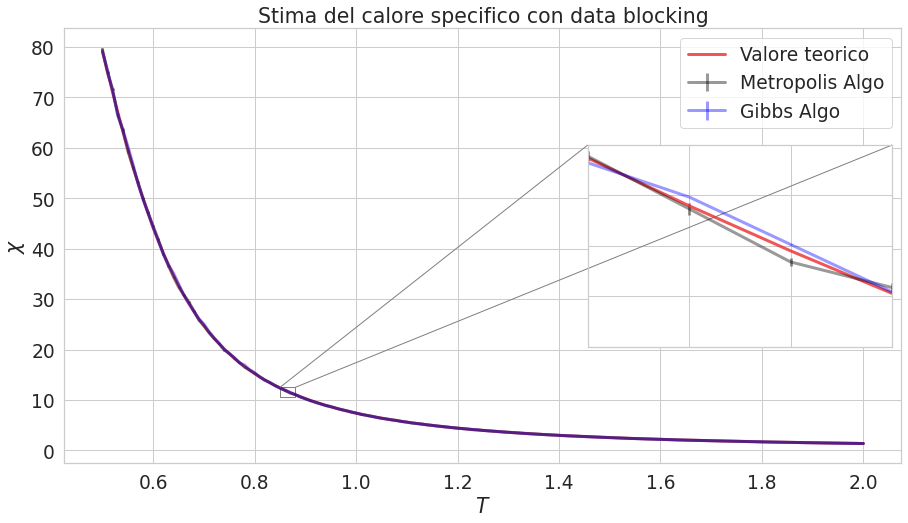

In [217]:
fig, ax = plt.subplots(figsize=[15, 8])
plt.title("Stima del calore specifico con data blocking")
plt.ylabel("$\chi$")
plt.xlabel("$T$")
#plt.errorbar(T, ene_G.T[2], yerr=ene_G.T[3], color='blue', alpha=0.4, linewidth=3, label='Gibbs Algo')

x1, x2, y1, y2 = 0.85, 0.88, 10.5, 12.5
axins = zoomed_inset_axes(ax, zoom=20, loc=5)
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
plt.xticks(visible=False)
plt.yticks(visible=False)

ax.plot(T, chi, color='#EE2C2C', linestyle='-', label="Valore teorico", linewidth=3, alpha=0.8)
axins.plot(T, chi, color='#EE2C2C', linestyle='-', label="Valore teorico", linewidth=3, alpha=0.8)
ax.errorbar(T, chi_metro.T[2], yerr=chi_metro.T[3], color='black', alpha=0.4, linewidth=3, label='Metropolis Algo')
axins.errorbar(T, chi_metro.T[2], yerr=chi_metro.T[3], color='black', alpha=0.4, linewidth=3, label='Metropolis Algo')
ax.errorbar(T, chi_gibbs.T[2], yerr=ene_gibbs.T[3], color='blue', alpha=0.4, linewidth=3, label='Gibbs Algo')
axins.errorbar(T, chi_gibbs.T[2], yerr=ene_gibbs.T[3], color='blue', alpha=0.4, linewidth=3, label='Gibbs Algo')

mark_inset(ax, axins, loc1=2, loc2=1, fc="none", ec="0.5")

ax.legend()
plt.show()

In [186]:
# Soluzione analitica
h=0.02 # Campo esterno
b = 1/T

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns

M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)

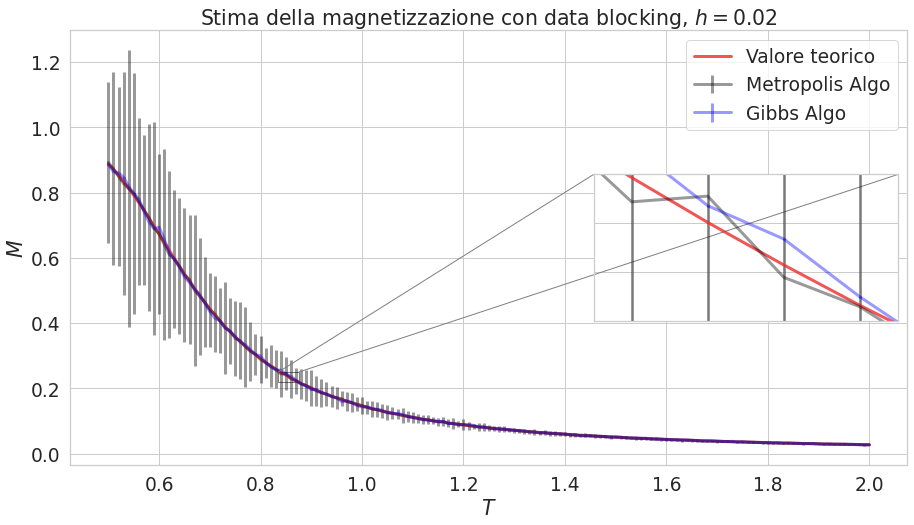

In [221]:
fig, ax = plt.subplots(figsize=[15, 8])
plt.title("Stima della magnetizzazione con data blocking, $h=0.02$")
plt.ylabel("$M$")
plt.xlabel("$T$")

x1, x2, y1, y2 = 0.835, 0.875, 0.22, 0.25
axins = zoomed_inset_axes(ax, zoom=15, loc=5)
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
plt.xticks(visible=False)
plt.yticks(visible=False)

ax.plot(T, M, color='#EE2C2C', linestyle='-', label="Valore teorico", linewidth=3, alpha=0.8)
axins.plot(T, M, color='#EE2C2C', linestyle='-', label="Valore teorico", linewidth=3, alpha=0.8)
ax.errorbar(T, M_metro.T[2], yerr=chi_metro.T[3], color='black', alpha=0.4, linewidth=3, label='Metropolis Algo')
axins.errorbar(T, M_metro.T[2], yerr=chi_metro.T[3], color='black', alpha=0.4, linewidth=3, label='Metropolis Algo')
ax.errorbar(T, M_gibbs.T[2], yerr=ene_gibbs.T[3], color='blue', alpha=0.4, linewidth=3, label='Gibbs Algo')
axins.errorbar(T, M_gibbs.T[2], yerr=ene_gibbs.T[3], color='blue', alpha=0.4, linewidth=3, label='Gibbs Algo')

mark_inset(ax, axins, loc1=2, loc2=1, fc="none", ec="0.5")

ax.legend()
plt.show()